### Hyperplane
Given hyperplane H, the normal vector v is the vector that is pendicular with the hyperplane H, and the vectors that are on the same side with the normal vector V will be positive, otherwise are negative. Based on this observation, we can try to split the vector space into two sides:

<img src="./images/hyperplane.png" width="600">

### Algorithm
1. Generate H normal vectors $[h_0, h_1, h_2, ...]$
2. For each normal vector, we take inner product $s = [<x, h_0>, <x, h_1>, ...]$
3. Take signs of inner products $s = sign(s)$
4. Assign 1 if sign is $+$, 0 if sign is $-$
5. The cluster is computed by: $c = \sum_i^H 2^i * s_i$

__Reference:__ https://www.pinecone.io/learn/series/faiss/locality-sensitive-hashing-random-projection/

### Observation

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [86]:
def find_normal_vector(v):
    # Normalize vector v
    v_norm = v / np.linalg.norm(v)

    # Generate a random vector
    random_vector = np.random.randn(len(v))

    # Project the random vector onto the normalized vector v_norm
    projection = np.dot(random_vector, v_norm) * v_norm

    # Subtract the projection from the random vector to get the hyperplane normal vector
    normal = random_vector - projection

    return normal

hyperplane = np.random.uniform(size=(2,))
normal = find_normal_vector(hyperplane)

In [87]:
hyperplane.shape, normal.shape

((2,), (2,))

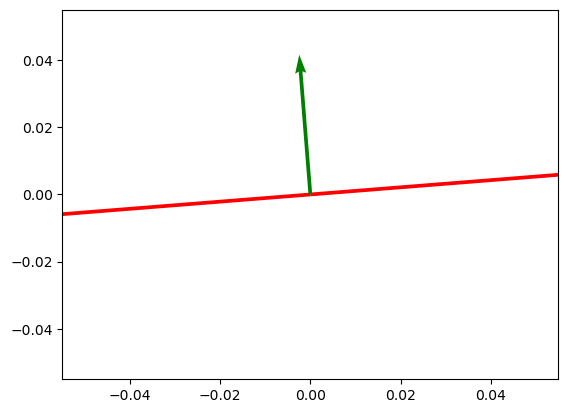

In [90]:
V = np.vstack((-hyperplane, hyperplane, normal))
origin = np.array([[0, 0], [0, 0],[0, 0]]).T

plt.quiver(*origin, V[:,0], V[:,1], color=['r','r','g'], scale=1)
plt.show()

In [94]:
X = np.random.uniform(size=(100,2), low=-2, high=2)

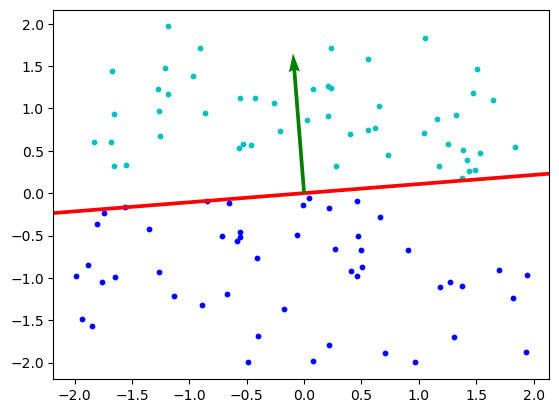

In [101]:
V = np.vstack((-hyperplane, hyperplane, normal))
origin = np.array([[0, 0], [0, 0],[0, 0]]).T

Side = np.sign(X.dot(normal))
X_r = X[Side == 1]
X_l = X[Side == -1]
plt.scatter(X_r[:,0], X_r[:, 1], c="c", s=10)
plt.scatter(X_l[:,0], X_l[:, 1], c="b", s=10)
plt.quiver(*origin, V[:,0], V[:,1], color=['r','r','g'], scale=1)
plt.show()

### Implementation

In [115]:
def lsh(H: np.array, x: np.array):
    c = 0
    s = np.sign(H.dot(x))
    s[s < 0] = 0
    for i, f in enumerate(s):
        c += 2**i * f
    return c

In [116]:
H = np.random.uniform(size=(3, 2), low=-1, high=1)
X = np.random.uniform(size=(100, 2), low=-3, high=3)

In [117]:
lsh(H, X.T)

array([3., 1., 6., 7., 3., 3., 3., 0., 7., 6., 3., 0., 6., 7., 3., 4., 6.,
       7., 6., 3., 3., 4., 0., 6., 1., 6., 4., 0., 3., 4., 4., 4., 3., 7.,
       1., 0., 4., 6., 1., 4., 7., 3., 6., 1., 3., 7., 1., 7., 4., 4., 7.,
       1., 0., 4., 1., 1., 3., 4., 1., 7., 6., 3., 3., 3., 4., 6., 3., 1.,
       1., 1., 0., 3., 3., 0., 4., 3., 6., 6., 3., 0., 7., 4., 1., 4., 4.,
       6., 0., 4., 7., 4., 7., 6., 7., 1., 1., 7., 3., 0., 3., 3.])